<a href="https://colab.research.google.com/github/2303a51519/ADM/blob/main/Lab-3-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = pd.read_csv('/content/Iris (1).csv')

X = iris.drop('Species', axis=1)
y = iris['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [5]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)


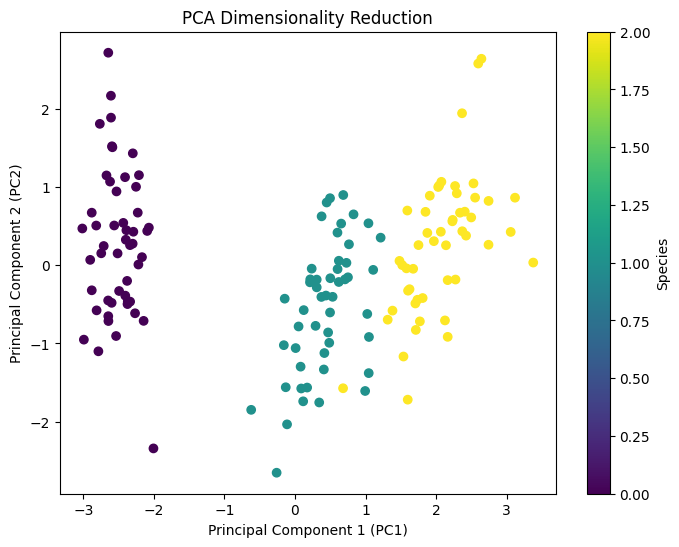

In [7]:
reduced_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2']) # Changed the columns to ['PC1', 'PC2'] to match the shape of X_reduced
reduced_df['Species'] = y

plt.figure(figsize=(8, 6))

plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Species'].astype('category').cat.codes, cmap='viridis')

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Dimensionality Reduction')
plt.colorbar(label='Species')

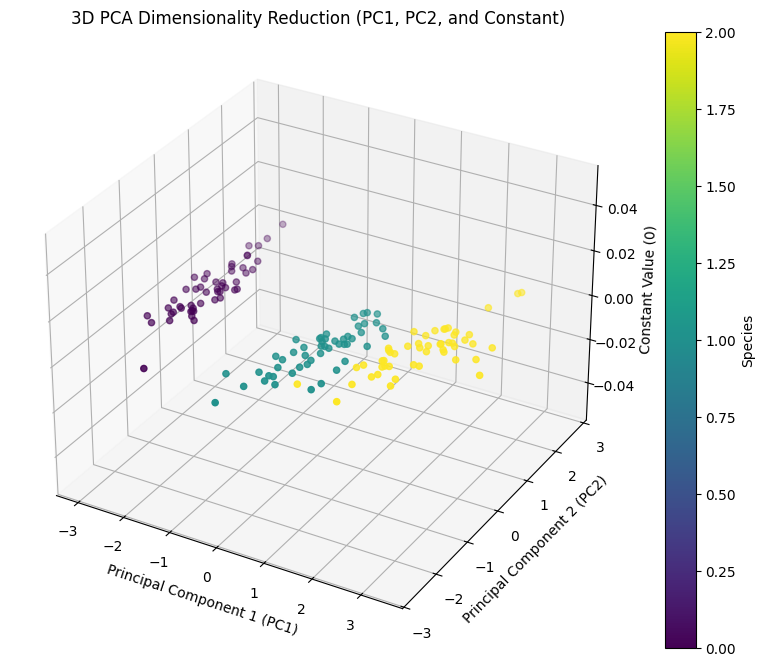

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# The error was due to trying to access 'PC3' which doesn't exist.
# Since we have only 2 principal components, we'll plot a 3D scatter
# using PC1, PC2, and a constant value for the third dimension.
# Here, we're using 0 as the constant value.

scatter = ax.scatter(reduced_df['PC1'], reduced_df['PC2'], 0,  # Using 0 for the third dimension
                    c=reduced_df['Species'].astype('category').cat.codes, cmap='viridis')

ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_zlabel('Constant Value (0)')  # Updated z-axis label
ax.set_title('3D PCA Dimensionality Reduction (PC1, PC2, and Constant)')  # Updated title

plt.colorbar(scatter, label='Species')

plt.show()